In [297]:
# MODUL CONVEX HULL

import math
from numpy.linalg import norm
import numpy as np

# Fungsi untuk menentukan apakah titik (xc,yc) berada di atas/kiri atau bawah/kanan
# garis yang dibentuk oleh titik (x1,y1) dan (x2,y2) dengan memanfaatkan konsep determinan
def determinant(xc, yc, x1, y1, x2, y2):
    result = (x1 * y2) + (xc * y1) + (x2 * yc) - (xc * y2) - (x2 * y1) - (x1 * yc)
    return result


# Fungsi untuk menentukan jarak titik (xc,yc) dengan garis yang dibentuk
# oleh titik (x1,y1) dan (x2,y2)
def distance(xc, yc, x1, y1, x2, y2):
    p1 = np.array([x1, y1])
    p2 = np.array([x2, y2])
    p3 = np.array([xc, yc])
    result = norm(np.cross(p2 - p1, p1 - p3)) / norm(p2-p1)
    return result


# Fungsi rekrusif untuk menentukan hull dari titik-titik suatu bangun ruang
def findHull(xBase1, yBase1, xBase2, yBase2, arrIdx, idxBase1, idxBase2, isTop, finalHull, myData):
    # Basis: apabila sudah tidak ada titik-titik di luar garis (arrIdx kosong)
    if len(arrIdx) == 0:
        # Titik (xBase1, yBase1) dan (xBase2, yBase2) membentuk Convex Hull
        matrixHull = [idxBase1, idxBase2]
        finalHull.append(matrixHull)
        
    # Rekurens: masih terdapat titik-titik di luar garis (arrIdx tidak kosong)
    else:
        # Mencari titik terjauh (xHull,yHull) dari garis yang dibentuk oleh titik (xBase1, yBase1) dan (xBase2, yBase2)
        idx = 0
        maxDist = distance(myData[arrIdx[idx]][0], myData[arrIdx[idx]][1], xBase1, yBase1, xBase2, yBase2)
        for i in range(1, len(arrIdx)):
            xc = myData[arrIdx[i]][0]
            yc = myData[arrIdx[i]][1]
            dist = distance(xc, yc, xBase1, yBase1, xBase2, yBase2)
            if dist > maxDist:
                idx = i
                maxDist = dist
        
        # Titik terjauh adalah titik yang akan menjadi titik pembentuk ConvexHull 
        xHull = myData[arrIdx[idx]][0]
        yHull = myData[arrIdx[idx]][1]
        
        # Menginisiasi dan mengisi array dengan index titik yang berada di 
        # luar (kiri atau kanan) titik-titik pembentuk Convex Hull
        leftArea = []
        rightArea = []
        
        for i in range(len(arrIdx)):
            xVal = myData[arrIdx[i]][0]
            yVal = myData[arrIdx[i]][1]
            
            # Menghitung determinan titik (xVal, yVal) dengan garis yang dibentuk oleh
            # titik (xBase1, yBase1) dan (xHull, yHull)
            det = determinant(xVal, yVal, xBase1, yBase1, xHull, yHull)
            # Sebuah titik akan dianggap berada pada garis apabila determinannya <= |0.0001|
            if not(det < 0.0001 and det > -0.0001):
                # Apabila garis merupakan garis yang berada di atas garis awal,
                # titik yang berada di luar garis adalah titik berdeterminan positif
                # sedangkan apabila garis merupakan garis yang berada di bawah garis awal,
                # titik yang berada di luar garis adalah titik berdeterminan negatif
                if isTop:
                    if det > 0:
                        leftArea.append(arrIdx[i])
                else:
                    if det < 0:
                        leftArea.append(arrIdx[i])
                        
            # Menghitung determinan titik (xVal, yVal) dengan garis yang dibentuk oleh
            # titik (xHull, yHull) dan (xBase2, yBase2)   
            det = determinant(xVal, yVal, xHull, yHull, xBase2, yBase2)
            if not(det < 0.0001 and det > -0.0001):
                if isTop:
                    if det > 0:
                        rightArea.append(arrIdx[i])
                else:
                    if det < 0:
                        rightArea.append(arrIdx[i])

        if isTop:
            findHull(xBase1, yBase1, xHull, yHull, leftArea, idxBase1, arrIdx[idx], True, finalHull, myData)
            findHull(xHull, yHull, xBase2, yBase2, rightArea, arrIdx[idx], idxBase2, True, finalHull, myData)  
        else:
            findHull(xBase1, yBase1, xHull, yHull, leftArea, idxBase1, arrIdx[idx], False, finalHull, myData)
            findHull(xHull, yHull, xBase2, yBase2, rightArea, arrIdx[idx], idxBase2, False, finalHull, myData)

            
# Fungsi utama untuk menentukan Convex Hull bangun ruang
def myConvexHull(myData):
    # Mencari titik dengan nilai axis terendah dan tertinggi
    minIdx = 0
    minVal = myData[minIdx][0]
    maxIdx = 0
    maxVal = myData[maxIdx][0]

    for i in range(1, len(myData)):
        if myData[i][0] < minVal:
            minIdx = i
            minVal = myData[minIdx][0]
        if myData[i][0] > maxVal:
            maxIdx = i
            maxVal = myData[maxIdx][0]
    
    # Titik (xBase1, yBase1) adalah titik dengan nilai axis terkecil,
    # berada di paling kiri
    xBase1 = myData[minIdx][0]
    yBase1 = myData[minIdx][1]
    
    # Titik (xBase2, yBase2) adalah titik dengan nilai axis terbesae,
    # berada di paling kanan
    xBase2 = myData[maxIdx][0]
    yBase2 = myData[maxIdx][1]
    
    # Menginisiasi dan mengisi array dengan index titik yang berada di 
    # luar (atas atau bawah) titik-titik pembentuk Convex Hull
    topArea = []
    bottomArea = []

    for i in range(len(myData)):
        xVal = myData[i][0]
        yVal = myData[i][1]
        det = determinant(xVal, yVal, xBase1, yBase1, xBase2, yBase2)
        
        # Sebuah titik akan dianggap berada pada garis apabila determinannya <= |0.0001|
        if not(det < 0.0001 and det > -0.0001):
            # Apabila determinan bernilai positif, posisi titik berada di atas
            # garis awal, sedangkan apabila determinan bernilai negatif, posisi 
            # titik berada di bawah garis awal
            if det > 0:
                topArea.append(i)
            else:
                bottomArea.append(i)
                
    finalHull = []
    findHull(xBase1, yBase1, xBase2, yBase2, topArea, minIdx, maxIdx, True, finalHull, myData)
    findHull(xBase1, yBase1, xBase2, yBase2, bottomArea, minIdx, maxIdx, False, finalHull, myData)
    
    return finalHull

Available Datasets: 
1 .  Iris
2 .  Breast Cancer
3 .  Wine
Select dataset (1-3): 3
Enter column index for axis (0-12): 11
Enter column index for ordinate (0-12): 4


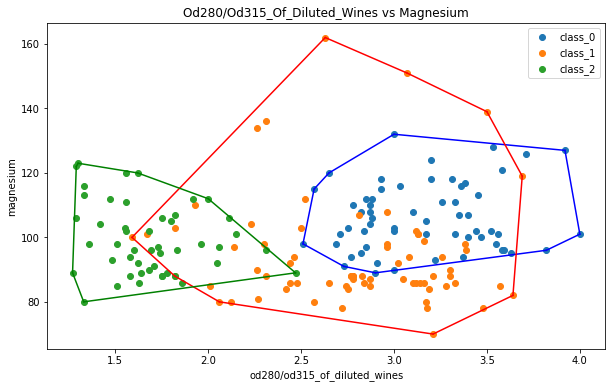

In [299]:
# MAIN PROGRAM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Memberi tahu pengguna dataset yang tersedia
print('Available Datasets: ')

availableDatasets = ['Iris', 'Breast Cancer', 'Wine']
maxRowDatasets = [3, 29, 12]

for i in range(len(availableDatasets)):
    print(i+1, '. ', availableDatasets[i])

# Meminta input nomor dataset kepada pengguna
# Asumsi input selalu valid
inputDataset = int(input('Select dataset (1-3): '))

# Meload dataset
if inputDataset == 1:
    data = datasets.load_iris()
elif inputDataset == 2:
    data = datasets.load_breast_cancer()
else:
    data = datasets.load_wine()

# Membuat dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

# Meminta input berupa index kolom yang akan dijadikan axis dan ordinat
# Asumsi input selalu berada didalam range yang diberikan
x = int(input(f'Enter column index for axis (0-{maxRowDatasets[inputDataset-1]}): '))
y = int(input(f'Enter column index for ordinate (0-{maxRowDatasets[inputDataset-1]}): '))

# Visualisasi hasil Convex Hull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']

xName = str.title(data.feature_names[x])
yName = str.title(data.feature_names[y])
title = xName + ' vs ' + yName
plt.title(title)

plt.xlabel(data.feature_names[x])
plt.ylabel(data.feature_names[y])

for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i].iloc[:,[x,y]].values
    # Menggunakan fungsi myConvexHull untuk menentukan titik-titik
    # yang membentuk Convex Hull dari dataset yang diberikan
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
        
plt.legend()